In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ex. 1: Vacation search results

### Poland

In [38]:
PL = pd.read_csv('vacationPL.csv', skiprows = 3, names = ['Date', 'PL'], index_col = 'Date', parse_dates = True)
PL

,PL
Date,
2004-01-01,42
2004-02-01,100
2004-03-01,66
2004-04-01,90
2004-05-01,82
...,...
2021-11-01,37
2021-12-01,69
2022-01-01,70


### UK

In [39]:
UK = pd.read_csv('vacationUK.csv', skiprows = 3, names = ['Date', 'UK'], index_col = 'Date', parse_dates = True)
UK

,UK
Date,
2004-01-01,38
2004-02-01,32
2004-03-01,35
2004-04-01,33
2004-05-01,33
...,...
2021-11-01,24
2021-12-01,42
2022-01-01,31


### USA

In [40]:
USA = pd.read_csv('vacationUSA.csv', skiprows = 3, names = ['Date', 'USA'], index_col = 'Date', parse_dates = True)
USA

,USA
Date,
2004-01-01,87
2004-02-01,76
2004-03-01,71
2004-04-01,66
2004-05-01,80
...,...
2021-11-01,48
2021-12-01,61
2022-01-01,52


### Merge

In [41]:
result = pd.concat([PL, UK, USA], axis = 1)
result

,PL,UK,USA
Date,,,
2004-01-01,42,38,87
2004-02-01,100,32,76
2004-03-01,66,35,71
2004-04-01,90,33,66
2004-05-01,82,33,80
...,...,...,...
2021-11-01,37,24,48
2021-12-01,69,42,61
2022-01-01,70,31,52


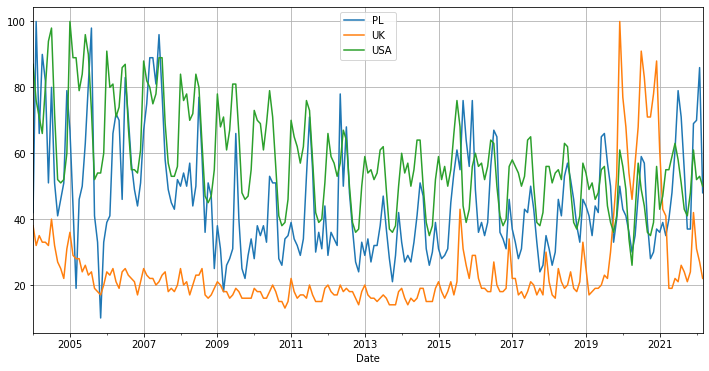

In [42]:
result['PL'].plot(figsize = (12, 6)).autoscale(axis = 'x', tight = True)
result['UK'].plot()
result['USA'].plot()
plt.legend()
plt.grid()

### Descriptive statistics

In [43]:
result.describe()

,PL,UK,USA
count,219.000000,219.000000,219.000000
mean,45.799087,24.543379,58.301370
std,17.214667,14.441330,14.830249
min,10.000000,13.000000,26.000000
25%,33.000000,17.000000,49.000000
50%,42.000000,20.000000,56.000000
75%,54.000000,24.500000,67.000000
max,100.000000,100.000000,100.000000


### Histograms

<AxesSubplot:>

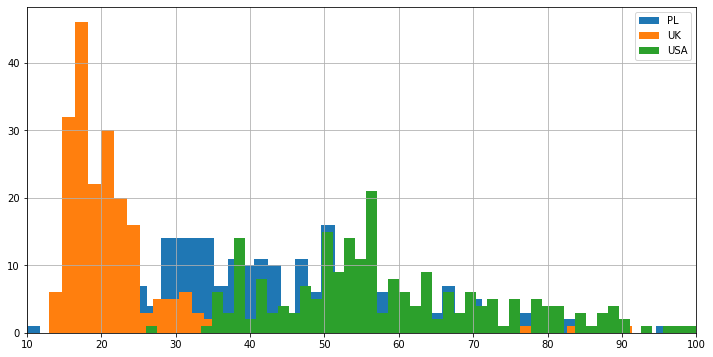

In [44]:
result['PL'].hist(bins = 50, legend = True, figsize = (12, 6)).autoscale(axis = 'x', tight = True)
result['UK'].hist(bins = 50,legend = True)
result['USA'].hist(bins = 50, legend = True)

### Kernel densities

(0.0, 120.0)

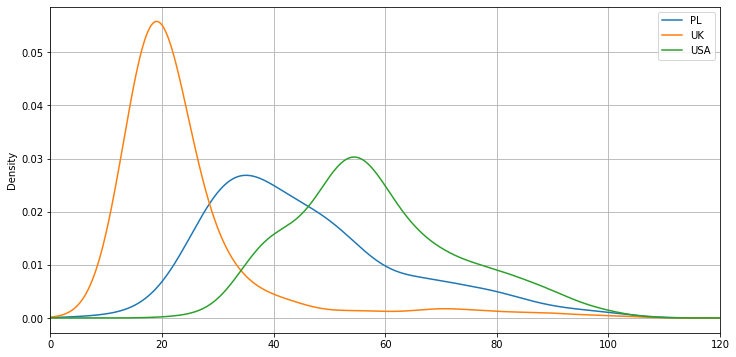

In [45]:
result['PL'].plot.kde(figsize = (12, 6)).autoscale(axis = 'x', tight = True)
result['UK'].plot.kde()
result['USA'].plot.kde()
plt.legend()
plt.grid()
plt.xlim(0, 120)

# Ex. 2: Average temperature dataset

### Import

In [46]:
T = pd.read_csv('temperature.csv', skiprows = 5, names = ['Date', 'Value', 'Anomaly'])
T

,Date,Value,Anomaly
0,193901,38.1,7.7
1,193902,33.3,-2.0
2,193903,47.3,2.7
3,193904,52.7,-3.8
4,193905,68.7,2.3
...,...,...,...
992,202109,73.5,3.3
993,202110,63.9,4.7
994,202111,46.2,0.9
995,202112,45.7,11.1


### Change -99 to NaN

In [47]:
T.replace(-99.0, np.nan, inplace = True)
#2013-03 was -99
T.tail(110)
# Not sure about the anomaly of 2013-03, it's still for value -99, should i fix it?

,Date,Value,Anomaly
887,201212,41.2,6.6
888,201301,35.1,4.7
889,201302,35.1,-0.2
890,201303,NaN,-143.6
891,201304,54.9,-1.6
...,...,...,...
992,202109,73.5,3.3
993,202110,63.9,4.7
994,202111,46.2,0.9
995,202112,45.7,11.1


### Interpolate NaN's

In [48]:
T.interpolate(inplace = True)
#2013-03 was NaN
T.tail(110)

,Date,Value,Anomaly
887,201212,41.2,6.6
888,201301,35.1,4.7
889,201302,35.1,-0.2
890,201303,45.0,-143.6
891,201304,54.9,-1.6
...,...,...,...
992,202109,73.5,3.3
993,202110,63.9,4.7
994,202111,46.2,0.9
995,202112,45.7,11.1


### Change index to datetime format

In [49]:
T['Date'] = pd.to_datetime(T['Date'], format = '%Y%m')
T.set_index('Date', inplace = True)
T

,Value,Anomaly
Date,,
1939-01-01,38.1,7.7
1939-02-01,33.3,-2.0
1939-03-01,47.3,2.7
1939-04-01,52.7,-3.8
1939-05-01,68.7,2.3
...,...,...
2021-09-01,73.5,3.3
2021-10-01,63.9,4.7
2021-11-01,46.2,0.9


### Average temperature for each year

In [50]:
# Removing last value 2022-01-01 so the average is not just from 1 month - makes the graph look bad
T.drop(index = T.index[-1], axis = 0, inplace = True)

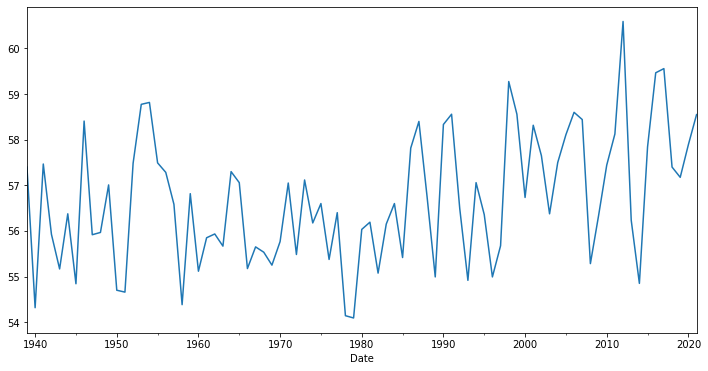

In [51]:
T['Value'].resample(rule = 'Y').mean().plot(figsize = (12, 6)).autoscale(axis = 'x', tight = True)

### Histogram

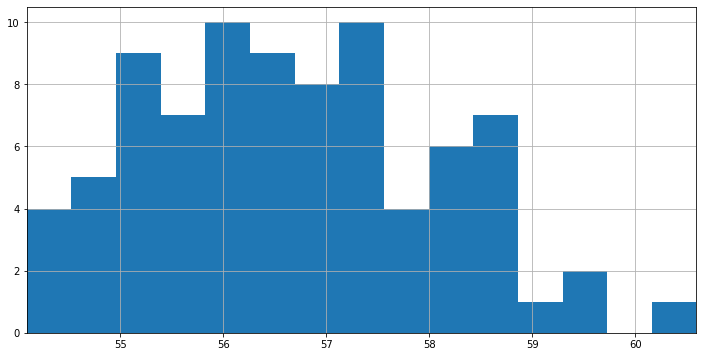

In [52]:
T['Value'].resample(rule = 'Y').mean().hist(bins = 15, figsize = (12, 6)).autoscale(axis = 'x', tight = True)

### Kernel density

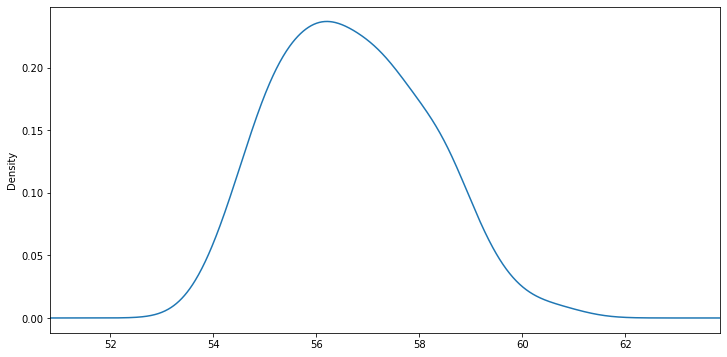

In [53]:
T['Value'].resample(rule = 'Y').mean().plot.kde(figsize = (12, 6)).autoscale(axis = 'x', tight = True)

### Descriptive statistics

In [55]:
T.describe()

,Value,Anomaly
count,996.000000,996.000000
mean,56.682229,0.204317
std,17.511804,5.898951
min,14.400000,-143.600000
25%,40.675000,-1.900000
50%,58.450000,0.400000
75%,73.425000,2.700000
max,87.500000,15.900000
